# Assignment to be handed in to romain.madar@cern.ch **and** lennart.rustige@cern.ch by 29/09/2019 23:59:59 CEST

### Import and plots settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

# Getting the data

You can execute the first cell below, which will create a data set `data_set.npy` (you need **first** to download the file `DataGeneration.py` in your working directory). You can then load the data (stored in a binary format) into a numpy ndarray by setting the variable `file_name` to point to the file you have downloaded.

In [3]:
# Creating the dataset
import DataGeneration as dg 
data = dg.generate_data(N=1000000)
np.save('data_set.npy', data)

In [4]:
# Loading the data
file_name = 'data_set.npy'
data = np.load(file_name)

**a**. Familiarise yourself with the data set.
- what is the dimensionality
- how many entries are there
- how can you access certain elements 

In [5]:
print(data.shape)

(1000000, 9, 3)


There 10^6 entries of 9 3D vectors (there are 3 dimensions). To access for example the second vector of the 8th observation, we can do:

In [12]:
my_vector = data[7, 1, :]
print(my_vector)

[3.66560505 3.72239614 4.13912798]


The data set should contain 1,000,000 observations (blocks) of 9 3D spatial positions (points), i.e. $r_i = (x,y,z)_i$, which are simply obtained from independent normal distributions with $(\mu_i,\sigma_i) = (\mu_x,\mu_y,\mu_z,\sigma_x,\sigma_y,\sigma_z)_i$. For this dataset, we set $\sigma_x=\sigma_y=\sigma_z=\sigma=1$ for all normal distributions. The mean however is different for each of the normal distributions corresponding to one of the 9 points, so that the points are centered on the 8 corners of a cube with a side length of $2d=10$ and the base at $(0,0)$.

If you did not fully understand this (and also otherwise), play around with the data and visualise it to get a better feeling of the structure.

**b**. Plot the 500 first observations in the $(x,y,z)$ space for all positions inclusively (with the same color), and then with one color for each of the 9 positions. 

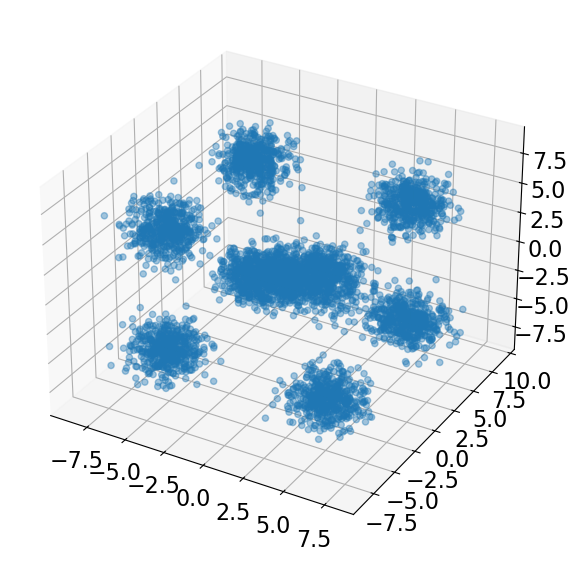

In [15]:
from mpl_toolkits import mplot3d

def plot_points_same_color(points):
    plt.figure(figsize=(10, 7))
    ax = plt.axes(projection='3d')
    xi, yi, zi = points[:, :, 0], points[:, :, 1], points[:, :, 2]
    ax.scatter3D(xi, yi, zi, alpha=0.4, label='before translation')

plot_points_same_color(data[:500])

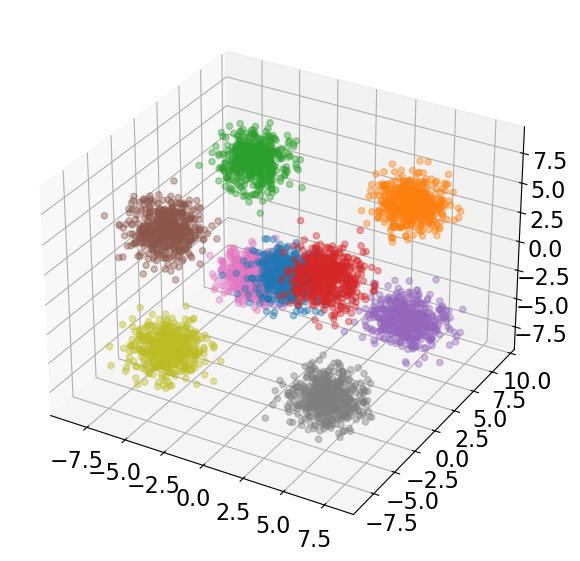

In [16]:
def plot_points_diff_color(points):
    plt.figure(figsize=(10, 7))
    ax = plt.axes(projection='3d')
    for i in np.arange(data.shape[1]):
        xi, yi, zi = points[:, i, 0], points[:, i, 1], points[:, i, 2]
        ax.scatter3D(xi, yi, zi, alpha=0.4)

plot_points_diff_color(data[:500])

### Counting position within a circle of radius $R$

**a**. Select the vectors $r_i$ which are inside a sphere centered around the origin with a radius $R=10$, and the ones which are outside of it. Plot each $r_i$ in space for the first 500 observations (different colour for whether they are inside or outside the sphere).

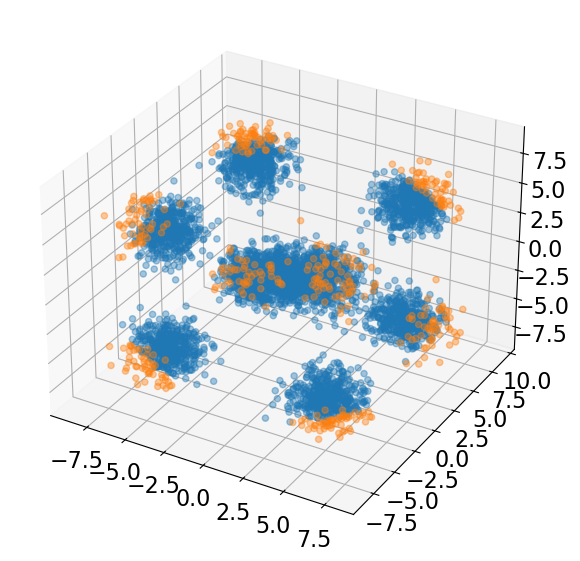

In [38]:
# Select only the first 500 points
data_s = data[:500]

# Radius and inside/outside
radius_s = np.sqrt( np.sum(data_s**2, axis=2) )
inside_s = radius_s<10

# Plot
plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
xi, yi, zi = data_s[inside_s, 0], data_s[inside_s, 1], data_s[inside_s, 2]
ax.scatter3D(xi, yi, zi, alpha=0.4)
xo, yo, zo = data_s[~inside_s, 0], data_s[~inside_s, 1], data_s[~inside_s, 2]
ax.scatter3D(xo, yo, zo, alpha=0.4);

b. Count the number of points **per observation** which are within the sphere, and plot the distribution of the number over the 1000000 observations.

(1000000,)


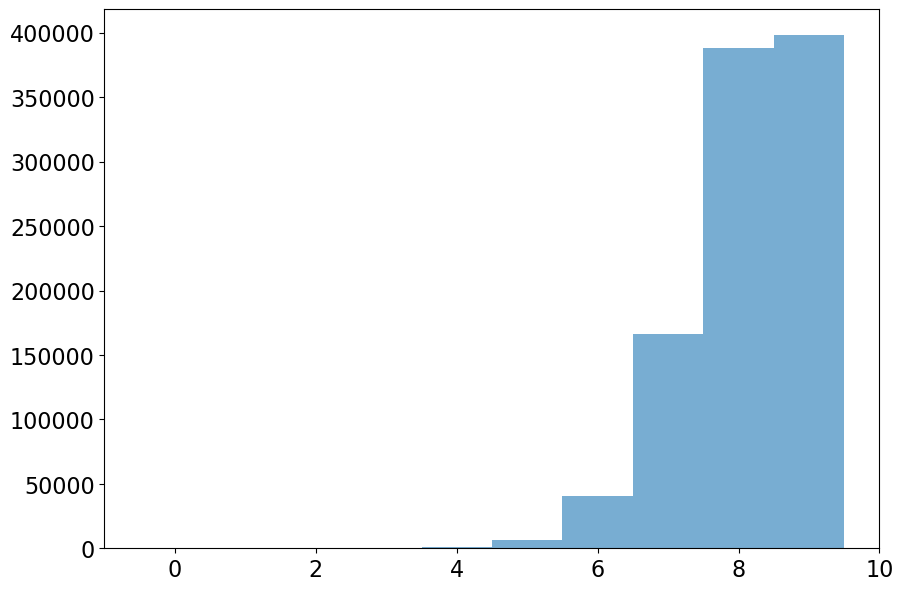

In [45]:
# Number of point in the sphere
inside = np.sum(data**2, axis=2)**0.5<10
Ninside = np.count_nonzero(inside, axis=1)
print(Ninside.shape)

# plot the distribution
plt.hist(Ninside, bins=np.linspace(-0.5, 9.5, 11), alpha=0.6);

**c**. Numerically compute the radius $R_{95\%}$ for a sphere that contains $95\%$ of all the points.

In [ ]:
# Compute this once for all
Radius = np.sum(data**2, axis=2)**0.5

# Loop over Radius threshold
Rcut = np.linspace(0, 20, 100)
counts = []
for r in Rcut:
   counts.append( np.count_nonzero(Radius < r) )
counts = np.array(counts)

Ntot = data.shape[0] * data.shape[1]
plt.plot(Rcut, counts/Ntot)

# Impact of $\sigma$

You can study the effect of different variances on $R_{95\%}$ as computed above by creating your own datasets and redo the calculation.

We prepared a function to generate the data with different parameters in a `.py` file in this folder. You could import the content of that file into this notebook by using `import DataGeneration as dg`. 

Use the function defined in `DataGeneration` to create different data sets.

- what is the dependence of $R_{95\%}$ on the value of $\sigma$ that you choose?
- we are using randomn numbers for our simulation which change with each execution of the code. Statistically speaking, how stable is your computation of $R_{95\%}$? How does that change if you vary the number of simulated observations?
- how many observations do you nead at least to draw a meaningful conclusion about $R_{95\%}$? This is meant to be answered in a very general fashion. Is it 1? 10? 100? 1,000,000?